In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sopt
import scipy.stats as stats
from scipy.stats import anderson

In [2]:
datos=pd.read_excel('Datos.xlsx')

In [3]:
datos=datos.dropna()

In [4]:
datos.head()

,Datos destilación,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
2,"Volumen evaporado, %","tiempo, s","Temperatura de destilación, °C","Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,375,26.6,Primera gota,376,29.6,Primera gota,379,28.4,Primera gota,375,30.8
4,5,460,43.5,5,458,45.8,5,459,44.3,5,465,47.4
5,10,529.7,50.2,10,529.4,52.6,10,530.4,51,10,536.4,52.3
6,15,599.5,55.7,15,599.1,58,15,601.8,56.8,15,607.8,58.3


In [5]:
datosCorrida2=pd.concat([datos['Unnamed: 3'],datos['Unnamed: 4'],datos['Unnamed: 5']],axis=1)

In [6]:
datosCorrida2.head()

,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,376,29.6
4,5,458,45.8
5,10,529.4,52.6
6,15,599.1,58


In [7]:
datosCorrida2.columns=datosCorrida2.iloc[0]

In [8]:
datosCorrida2=datosCorrida2.drop(2,axis=0)

In [9]:
datosCorrida2.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
3,Primera gota,376,29.6
4,5,458,45.8
5,10,529.4,52.6
6,15,599.1,58
7,20,676.1,63.6


In [10]:
datosCorrida2.index=[i for i in range(len(datosCorrida2))]

In [11]:
datosCorrida2.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
0,Primera gota,376,29.6
1,5,458,45.8
2,10,529.4,52.6
3,15,599.1,58
4,20,676.1,63.6


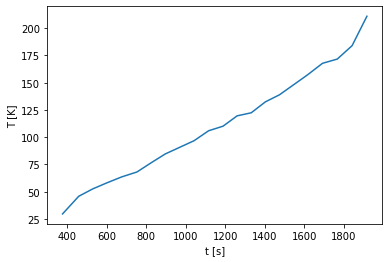

In [12]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Temperatura de destilación'])
plt.xlabel('t [s]')
plt.ylabel('T [K]')
plt.show()

In [13]:
datosCorrida2['Volumen evaporado, %'][0]=0.1

In [14]:
datosCorrida2.head()

2,"Volumen evaporado, %",tiempo,Temperatura de destilación
0,0.1,376,29.6
1,5,458,45.8
2,10,529.4,52.6
3,15,599.1,58
4,20,676.1,63.6


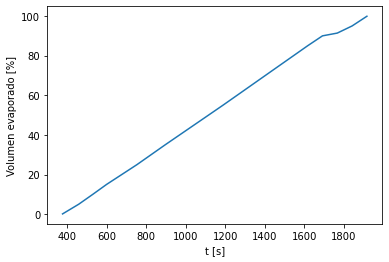

In [15]:
plt.plot(datosCorrida2['tiempo'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('t [s]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

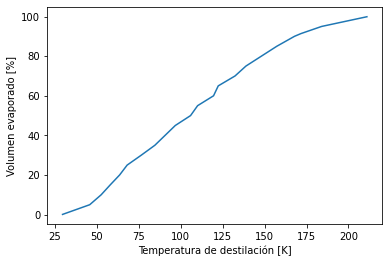

In [16]:
plt.plot(datosCorrida2['Temperatura de destilación'],datosCorrida2['Volumen evaporado, %'])
plt.xlabel('Temperatura de destilación [K]')
plt.ylabel('Volumen evaporado [%]')
plt.show()

# Modelo empírico polinomial

Para la temperatura como función del tiempo, se observa que existe cierta linealidad; sin embargo, podría expandirse un polinomio de grado mayor, lo que permitiría aumentar el ajuste, de esta forma, se escoge un polinomio de ajuste de la forma:

$$T(t)=At^3+Bt^2+Ct+D$$

In [17]:
tiempo,temperatura=np.asarray(datosCorrida2['tiempo']).astype('float64'),np.asarray(datosCorrida2['Temperatura de destilación']).astype('float64')

In [18]:
def TPolinomio(t,A,B,C,D):
    return A*t**3+B*t**2+C*t+D

In [19]:
coefsP,covP=sopt.curve_fit(TPolinomio,tiempo,temperatura)
ajusTPoli=TPolinomio(tiempo,coefsP[0],coefsP[1],coefsP[2],coefsP[3])
residuosEmpíricoPoli=ajusTPoli-temperatura

In [20]:
coefsP

array([ 3.75542272e-08, -1.09570133e-04,  1.91978516e-01, -2.64023163e+01])

In [21]:
desvEstP=(residuosEmpíricoPoli**2).sum()/(len(residuosEmpíricoPoli)-1)
desvEstP

9.615620682485341

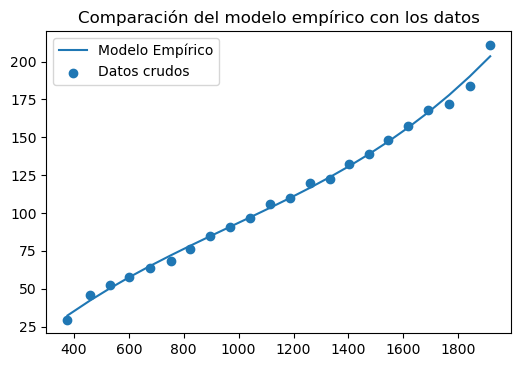

In [22]:
plt.figure(dpi=100)
plt.plot(tiempo,ajusTPoli)
plt.scatter(tiempo,temperatura)
plt.title('Comparación del modelo empírico con los datos')
plt.legend(['Modelo Empírico','Datos crudos'])
plt.savefig('ModeloEmpírico.png')
plt.show()

### Diagnósticos de los residuos para el modelo polinómico

#### Prueba de normalidad

Se observa que el coeficiente de Anderson-Darling calculado es menor al valor teórico con un $95\%$ de confianza, por lo que se acepta la normalidad de los residuos.

In [23]:
anderson(residuosEmpíricoPoli).statistic,anderson(residuosEmpíricoPoli).critical_values[2]

(0.4177778993528811, 0.696)

#### Gráficas de residuos

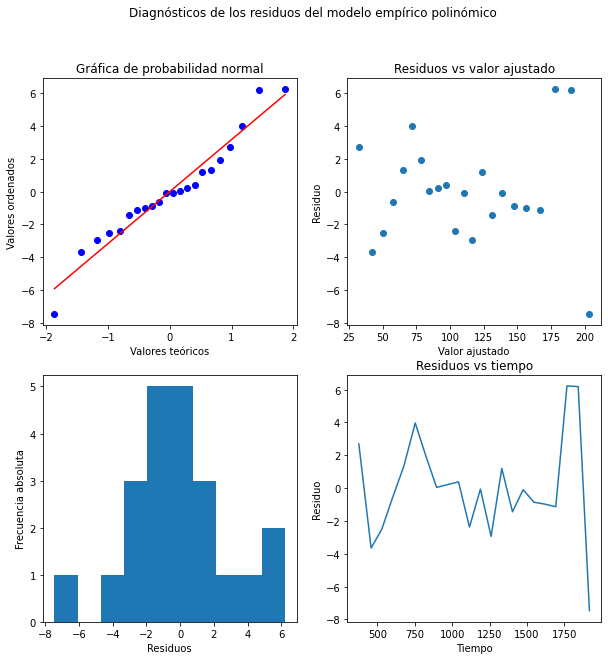

In [24]:
fig1,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosEmpíricoPoli,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusTPoli,residuosEmpíricoPoli)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosEmpíricoPoli)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(tiempo,residuosEmpíricoPoli)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig1.suptitle('Diagnósticos de los residuos del modelo empírico polinómico')
plt.savefig('DiagnósticoEmpírico.png')
plt.show()

# Modelo teórico

## Balance de energía

Se define como volumen de control la muestra de hidrocarburos, se tiene entonces que:

$$V_{A}=F_{E}-F_{S}+V_{G}-V_{C}$$

* Velocidad de acumulación, $V_{A}=\frac{dM_{e}}{dt}$
* Flujo de entrada, $F_{E}=\dot{Q}$
* Flujo de salida, $F_{S}=\dot{M}_{S}\Delta H$
* Velocidad de generación, $R_{P}=0$
* Velocidad de consumo, $R_{C}=0$

$$\frac{dM_{e}}{dt}=\dot{Q}-\dot{M}_{S}\Delta H$$
$$\Rightarrow\frac{dMC\left(T-T_{ref}\right)}{dt}=\dot{Q}-\rho\dot{V}_{S}\Delta H$$
$$\Rightarrow\rho C\frac{dV\left(T-T_{ref}\right)}{dt}=\dot{Q}-\rho\dot{V}_{S}\Delta H$$
$$\Rightarrow\rho C\left(\left(T-T_{ref}\right)\frac{dV}{dt}+\frac{dT}{dt}V\right)=\dot{Q}-\rho\dot{V}_{S}\Delta H$$

### Balance de masa total

$$\frac{dM}{dt}=-\dot{M}_{s}$$
$$\Rightarrow \rho\frac{dV}{dt}=-\rho\dot{V}_{S}$$
$$\Rightarrow \frac{dV}{dt}=-\dot{V}_{S}$$

Integrando:

$$V=C_{1}-\dot{V}_{S}t$$

Como en $t=0$ se tiene que $V=V_{0}=100\textrm{ mL}$:

$$V=V_{0}-\dot{V}_{s}t$$
$$\Rightarrow \frac{dV}{dt}=-\dot{V}_{S}$$

### Sustitución

$$\Rightarrow\rho C\left(-\dot{V}_{S}\left(T-T_{ref}\right)+\frac{dT}{dt}\left(V_{0}-\dot{V}_{S}t\right)\right)=\dot{Q}-\rho\dot{V}_{S}\Delta H$$

Tomando $T_{ref}=0$ para la temperatura de referencia de la capacidad calorífica:

$$\Rightarrow\rho C\left(-\dot{V}_{S}T+\frac{dT}{dt}\left(V_{0}-\dot{V}_{S}t\right)\right)=\dot{Q}-\rho\dot{V}_{S}\Delta H$$

Simplificando:

$$\frac{dT}{dt}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t}T=\frac{\dot{Q}-\rho\dot{V}_{S}\Delta H}{\rho C\left(V_{0}-\dot{V}_{S}t\right)}$$

Tomando $\Delta H(t)=a+bt$:

$$\frac{dT}{dt}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t}T=\frac{\dot{Q}-\rho\dot{V}_{S}a-\rho\dot{V}_{S}bt}{\rho C\left(V_{0}-\dot{V}_{S}t\right)}$$

Ahora se debe buscar la solución de esta expresión, para esto, se toma el factor integrante:

$$F_{I}(t)=\exp{\left(\int^{t}-\frac{\dot{V}_{S}}{V_{0}-\dot{V}_{S}t'}dt\right)}=V_{0}-\dot{V}_{S}t$$

Multilicando a ambos lados la ecuación por el factor integrante:

$$\left(V_{0}-\dot{V}_{S}t\right)\frac{dT}{dt}-\dot{V}_{S}T=\frac{\dot{Q}-\rho\dot{V}_{S}a-\rho\dot{V}_{S}bt}{\rho C}$$

Esto se puede simplificar de la forma:

$$\frac{d}{dt}\left(\left(V_{0}-\dot{V}_{S}t\right)T\right)=\frac{\dot{Q}-\rho\dot{V}_{S}a-\rho\dot{V}_{S}bt}{\rho C}$$

Integrando:

$$\left(V_{0}-\dot{V}_{S}t\right)T=\frac{\left(2\dot{Q}-2\rho\dot{V}_{S}a\right)t-\rho\dot{V}_{S}bt^2}{2\rho C}+C_{2}$$
$$\Rightarrow T=\frac{\left(2\dot{Q}-2\rho\dot{V}_{S}a\right)t-\rho\dot{V}_{S}bt^2}{2\rho C\left(V_{0}-\dot{V}_{S}t\right)}+\frac{C_{2}}{\left(V_{0}-\dot{V}_{S}t\right)}$$

En $t=t_{i}$, $T=T_{i}$, entonces:

$$T_{i}=\frac{2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}-\dot{V}_{S}bt_{i}^2}{2 CV_{0}-2 C\dot{V}_{S}t_{i}}+\frac{C_{2}}{\left(V_{0}-\dot{V}_{S}t_{i}\right)}$$
$$\Rightarrow T_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-\frac{2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}-\dot{V}_{S}bt_{i}^2}{2C}=C_{2}$$
$$C_{2}=\frac{2CT_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}-\dot{V}_{S}bt_{i}^2}{2C}$$

Sustituyendo:

$$T=\frac{\left(2\dot{Q}-2\rho\dot{V}_{S}a\right)t-\rho\dot{V}_{S}bt^2}{2\rho C\left(V_{0}-\dot{V}_{S}t\right)}+\frac{2CT_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}-\dot{V}_{S}bt_{i}^2}{2C\left(V_{0}-\dot{V}_{S}t\right)}$$

Para efectos de la simplificación del ajuste, se llamará como $K$ la expresión $2CT_{i}\left(V_{0}-\dot{V}_{S}t_{i}\right)-2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t_{i}-\dot{V}_{S}bt_{i}^2$, por lo que el modelo final quedará como:

$$T=\frac{2\left(\frac{\dot{Q}}{\rho}-\dot{V}_{S}a\right)t-\dot{V}_{S}bt^2}{2 C\left(V_{0}-\dot{V}_{S}t\right)}+\frac{K}{2C\left(V_{0}-\dot{V}_{S}t\right)}$$

In [25]:
volumen=np.asarray(datosCorrida2['Volumen evaporado, %']).astype('float64')

In [26]:
V0=100

In [27]:
def Volumen(t,Vs):
    return V0-Vs*t

In [28]:
coefsV,covV=sopt.curve_fit(Volumen,tiempo,(V0-volumen))
ajusV=Volumen(tiempo,coefsV[0])
residuosVolumen=ajusV-volumen

In [29]:
Vs=coefsV[0]
Vs

0.04814015187978919

In [30]:
def Teórico(t,Q,a,rho,b,C,K):
    return ((2*(Q/rho-Vs*a)*t-b*Vs*t**2)/(2*C*V0-2*C*Vs*t))+K/(2*C*(V0-Vs*t))

In [31]:
coefsT,covT=sopt.curve_fit(Teórico,tiempo,temperatura)
ajusT=Teórico(tiempo,coefsT[0],coefsT[1],coefsT[2],coefsT[3],coefsT[4],coefsT[5])
residuosTeórico=ajusT-temperatura

In [32]:
coefsT

array([-2.13955107e+01, -3.21935325e+02,  2.19338900e+01,  2.88916481e-01,
        1.63837674e+00,  6.88248785e+02])

In [33]:
desvEstT=(residuosTeórico**2).sum()/(len(residuosTeórico)-1)
desvEstT

6.445291952956333

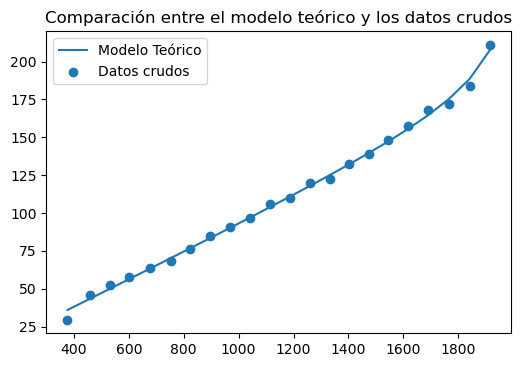

In [34]:
plt.figure(dpi=100)
plt.plot(tiempo,ajusT)
plt.scatter(tiempo,temperatura)
plt.legend(['Modelo Teórico','Datos crudos'])
plt.title('Comparación entre el modelo teórico y los datos crudos')
plt.savefig('ModeloTeórico.png')
plt.show()

In [35]:
anderson(residuosTeórico).statistic,anderson(residuosTeórico).critical_values[2]

(0.6025434697632406, 0.696)

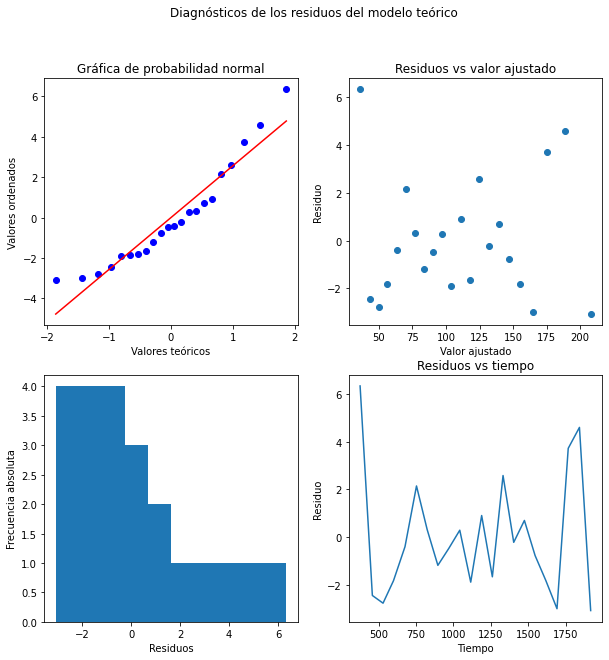

In [36]:
fig4,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
stats.probplot(residuosTeórico,dist='norm',plot=ax1)
ax1.set_title('Gráfica de probabilidad normal')
ax1.set_xlabel('Valores teóricos')
ax1.set_ylabel('Valores ordenados')
ax2.scatter(ajusT,residuosTeórico)
ax2.set_title('Residuos vs valor ajustado')
ax2.set_ylabel('Residuo')
ax2.set_xlabel('Valor ajustado')
ax3.hist(residuosTeórico)
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Frecuencia absoluta')
ax4.plot(tiempo,residuosTeórico)
ax4.set_title('Residuos vs tiempo')
ax4.set_ylabel('Residuo')
ax4.set_xlabel('Tiempo')
fig4.suptitle('Diagnósticos de los residuos del modelo teórico')
plt.savefig('DiagnósticoTeórico.png')
plt.show()

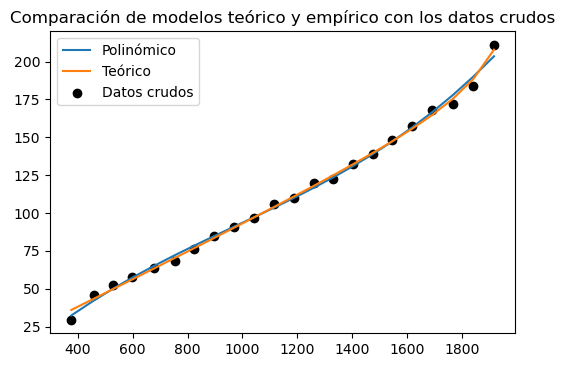

In [37]:
plt.figure(dpi=100)
plt.scatter(tiempo,temperatura,color='black')
plt.plot(tiempo,ajusTPoli)
plt.plot(tiempo,ajusT)
plt.legend(['Polinómico','Teórico','Datos crudos'])
plt.title('Comparación de modelos teórico y empírico con los datos crudos')
plt.savefig('AmbosModelos.png')
plt.show()

In [38]:
F=ajusT.std()**2/ajusTPoli.std()**2
F

1.001307818799682

Se tiene que el $F$ teórico para dos muestras con $22$ grados de libertad al $95\%$ de confianza es $2.048$, entonces, como el $F_{calc}$ calculado es menor al estadístico $F$ teórico, se puede concluir que los modelos son estadísticamente iguales al $95\%$.